In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses

In [54]:
df_input = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/input.csv")
df_producao = pd.read_csv("producao_mensal_cimento_2003_2022.csv")
# df_target = pd.read_csv("consumo_mensal_cimento_2003_2022.csv")
df_target = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/target.csv")
#df_target = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/target_ac.csv")

In [55]:
df_input = pd.merge(left=df_input, right=df_producao, how="inner", on=["estados", "data"])
# df_input = pd.merge(left=df_input, right=df_target, how="inner", on=["estados", "data"])

In [4]:
# df_input = df_input[(df_input["data"] >= 200301) & (df_input["data"] <= 202101)].reset_index(drop=True)

In [56]:
df_input = df_input[(df_input["data"] >= 200301)].reset_index(drop=True)

In [58]:
#df_input["consumo"] = df_input["consumo"].fillna(method='ffill')

# df_input = df_input[df_input["consumo"].notna()]

## EDA - INPUT Features

In [59]:
df_input.shape

(5508, 18)

In [60]:
df_input.head()

estados    data        pib_pc       pib_pmc  pib_pcpt  populacao  \
0      AC  200301  4.776457e+06  2.514261e+06  0.739806  2026069.0   
1      AL  200301  1.845731e+07  9.715676e+06  0.581097  4949222.0   
2      AM  200301  3.172256e+07  1.669832e+07  0.973688  3201324.0   
3      AP  200301  5.178904e+06  2.726104e+06  0.911519  7127956.0   
4      BA  200301  8.789838e+07  4.626850e+07  0.599762  2582075.0   

         pib_cc   ipca   incc   igp    selic  idh_long  idh_renda  \
0  4.642918e+05  25.94  29.87  2.17  0.06922    0.7189     0.7061   
1  9.506703e+05  25.94  29.87  2.17  0.06922    0.6794     0.6297   
2  2.201439e+06  25.94  29.87  2.17  0.06922    0.7416     0.5941   
3  2.875050e+05  25.94  29.87  2.17  0.06922    0.7259     0.6548   
4  6.462802e+06  25.94  29.87  2.17  0.06922    0.7109     0.6287   

   idh_educacao  nfsp       estoque  desemprego  producao  
0        0.3952  3.59  6.172460e+06    6.582788       NaN  
1        0.3534  3.59  6.172460e+06    9.080515       NaN  
2        0.4855  3.59  6.172460e+06   12.966133       NaN  
3        0.3951  3.59  6.172460e+06   20.539464       NaN  
4        0.3989  3.59  6.172460e+06   10.735432       NaN

In [61]:
df_input.tail()

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
5503      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
5504      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
5505      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
5506      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
5507      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc  ipca  incc   igp    selic  idh_long  idh_renda  \
5503  9.031052e+06   5.9  0.17  1.74  0.02462      0.78       0.70   
5504  6.353526e+06   5.9  0.17  1.74  0.02462      0.87       0.71   
5505  8.019597e+05   5.9  0.17  1.74  0.02462      0.85       0.78   
5506  3.482197e+07   5.9  0.17  1.74  0.02462      0.80       0.80   
5507  8.160933e+05   5.9  0.17  1.74  0.02462      0.81       0.68   

      idh_educacao  nfsp       estoque  desemprego  producao  
5503          0.77  0.49  7.827728e+06        11.1   49593.0  
5504          0.78  0.49  7.827728e+06        11.1   58832.0  
5505          0.83  0.49  7.827728e+06        11.1   55602.0  
5506          0.64  0.49  7.827728e+06        11.1   45010.0  
5507          0.73  0.49  7.827728e+06        11.1   45315.0

In [62]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   estados       5508 non-null   object 
 1   data          5508 non-null   int64  
 2   pib_pc        5508 non-null   float64
 3   pib_pmc       5508 non-null   float64
 4   pib_pcpt      5508 non-null   float64
 5   populacao     5508 non-null   float64
 6   pib_cc        5508 non-null   float64
 7   ipca          5508 non-null   float64
 8   incc          5508 non-null   float64
 9   igp           5508 non-null   float64
 10  selic         5508 non-null   float64
 11  idh_long      5508 non-null   float64
 12  idh_renda     5508 non-null   float64
 13  idh_educacao  5508 non-null   float64
 14  nfsp          5508 non-null   float64
 15  estoque       5508 non-null   float64
 16  desemprego    5508 non-null   float64
 17  producao      3887 non-null   float64
dtypes: float64(16), int64(1), ob

In [63]:
#df_input["desemprego"] = df_input["desemprego"].apply(lambda x: -1 if x == "Brasil" else x).astype(float)

## 1. Structure Investigation

In [64]:
df_input.dtypes.value_counts()

float64    16
int64       1
object      1
dtype: int64

### 1.1 Structure of numerical features


In [65]:
df_input.describe().transpose()

count          mean           std           min           25%  \
data          5508.0  2.011065e+05  4.899546e+02  2.003010e+05  2.007038e+05   
pib_pc        5508.0  1.079709e+08  1.824995e+08  3.673172e+06  2.101579e+07   
pib_pmc       5508.0  1.228944e+08  2.269532e+08  2.032867e+06  2.088946e+07   
pib_pcpt      5508.0  1.169918e+00  6.404342e-01  3.445102e-01  7.325471e-01   
populacao     5508.0  5.497531e+06  6.521539e+06  2.175830e+05  1.639035e+06   
pib_cc        5508.0  5.679715e+06  8.901938e+06  1.650221e+05  1.326100e+06   
ipca          5508.0  1.030896e+02  3.066513e+02  4.400000e-01  2.060000e+00   
incc          5508.0  5.382157e+00  1.162142e+01 -5.000000e-01  3.600000e-01   
igp           5508.0  5.033824e-01  6.252209e-01 -1.240000e+00  9.750000e-02   
selic         5508.0  4.810846e-02  1.568022e-02  2.462000e-02  3.756656e-02   
idh_long      5508.0  7.968786e-01  4.108502e-02  6.794000e-01  7.700000e-01   
idh_renda     5508.0  7.022333e-01  5.970379e-02  5.553000e-01  6.583333e-01   
idh_educacao  5508.0  6.219684e-01  1.037444e-01  3.534000e-01  5.538000e-01   
nfsp          5508.0  9.903922e-01  7.188332e-01 -7.000000e-02  6.000000e-01   
estoque       5508.0  7.094388e+06  6.036656e+05  6.172460e+06  6.529452e+06   
desemprego    5508.0  9.470574e+00  2.541836e+00  3.605658e+00  7.300000e+00   
producao      3887.0  1.803023e+05  2.320003e+05  1.653000e+03  5.067850e+04   

                       50%           75%           max  
data          2.011065e+05  2.015092e+05  2.019120e+05  
pib_pc        4.746963e+07  1.105834e+08  1.050063e+09  
pib_pmc       4.871749e+07  1.226171e+08  1.810701e+09  
pib_pcpt      9.974427e-01  1.431942e+00  3.894977e+00  
populacao     2.649747e+06  7.187355e+06  3.212606e+07  
pib_cc        2.683811e+06  6.152176e+06  5.822316e+07  
ipca          4.390000e+00  8.710000e+00  2.477150e+03  
incc          7.250000e-01  1.472500e+00  5.571000e+01  
igp           4.550000e-01  9.225000e-01  2.170000e+00  
selic         4.531474e-02  5.813049e-02  9.275780e-02  
idh_long      8.000000e-01  8.300000e-01  8.900000e-01  
idh_renda     6.946000e-01  7.420000e-01  8.630000e-01  
idh_educacao  6.400000e-01  7.000000e-01  8.400000e-01  
nfsp          8.400000e-01  1.220000e+00  4.060000e+00  
estoque       7.102236e+06  7.751228e+06  7.827728e+06  
desemprego    9.000000e+00  1.190000e+01  2.053946e+01  
producao      1.036500e+05  1.952855e+05  1.553703e+06

### 1.2 Structure of Non-Numeric features

In [66]:
df_input.describe(exclude='number').T

count unique top freq
estados  5508     27  RN  204

In [67]:
print(df_input["data"].min())
print(df_input["data"].max())

200301
201912


## 2. Quality Investigation

### 2.1. Unique values

<AxesSubplot:title={'center':'Unique Values per feature'}>

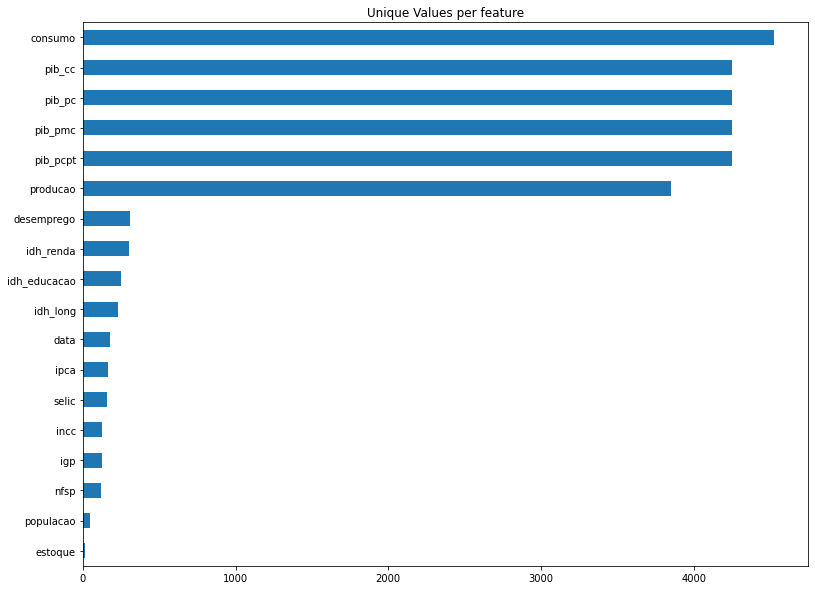

In [15]:
unique_values = df_input.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'estados')])

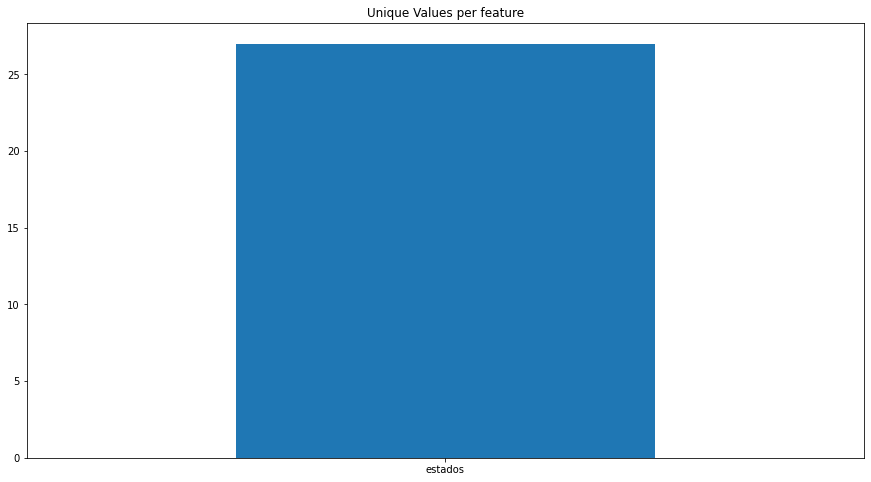

In [16]:
unique_values = df_input.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

### 2.2. Missing values

In [17]:
print("There are", df_input.isna().any().sum(), "variables with missing values from a total of", df_input.shape[1])

There are 1 variables with missing values from a total of 19


In [18]:
(df_input.isna().sum()/df_input.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<BarContainer object of 19 artists>

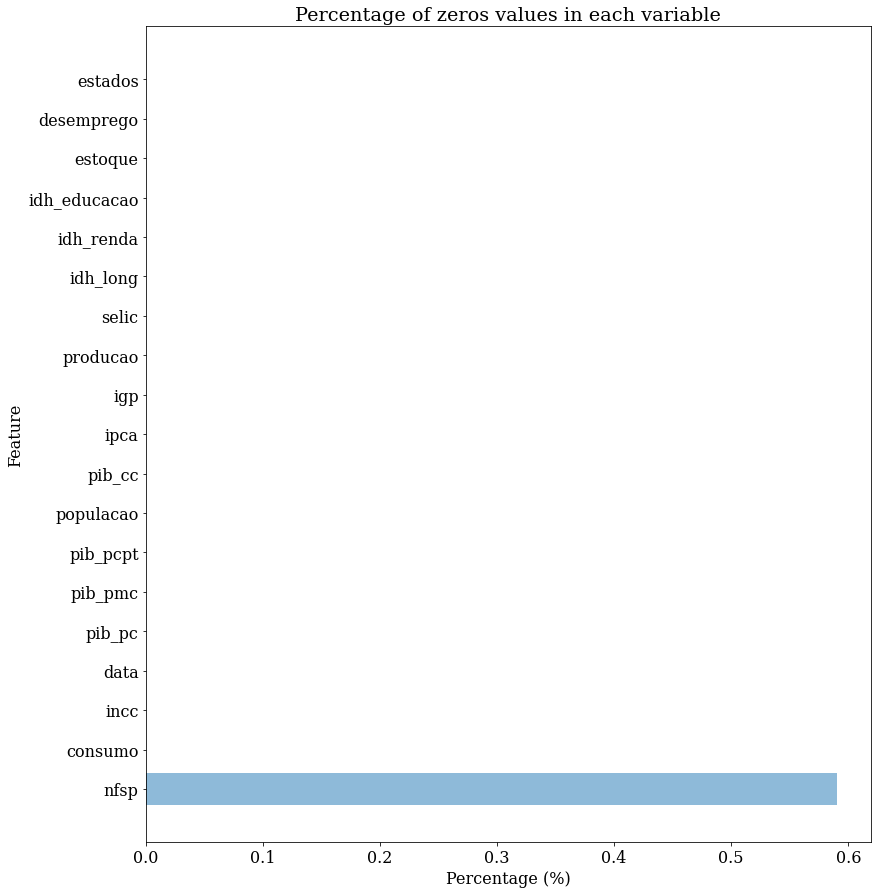

In [19]:
zeros_perc = (df_input == 0).sum(axis=0) / df_input.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

### 2.4. Duplicates

In [20]:
n_duplicates = df_input.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [21]:
n_duplicates = (
    df_input.drop(["data", "estados"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


## 3. Content Investigation

### 3.1. Feature distribution

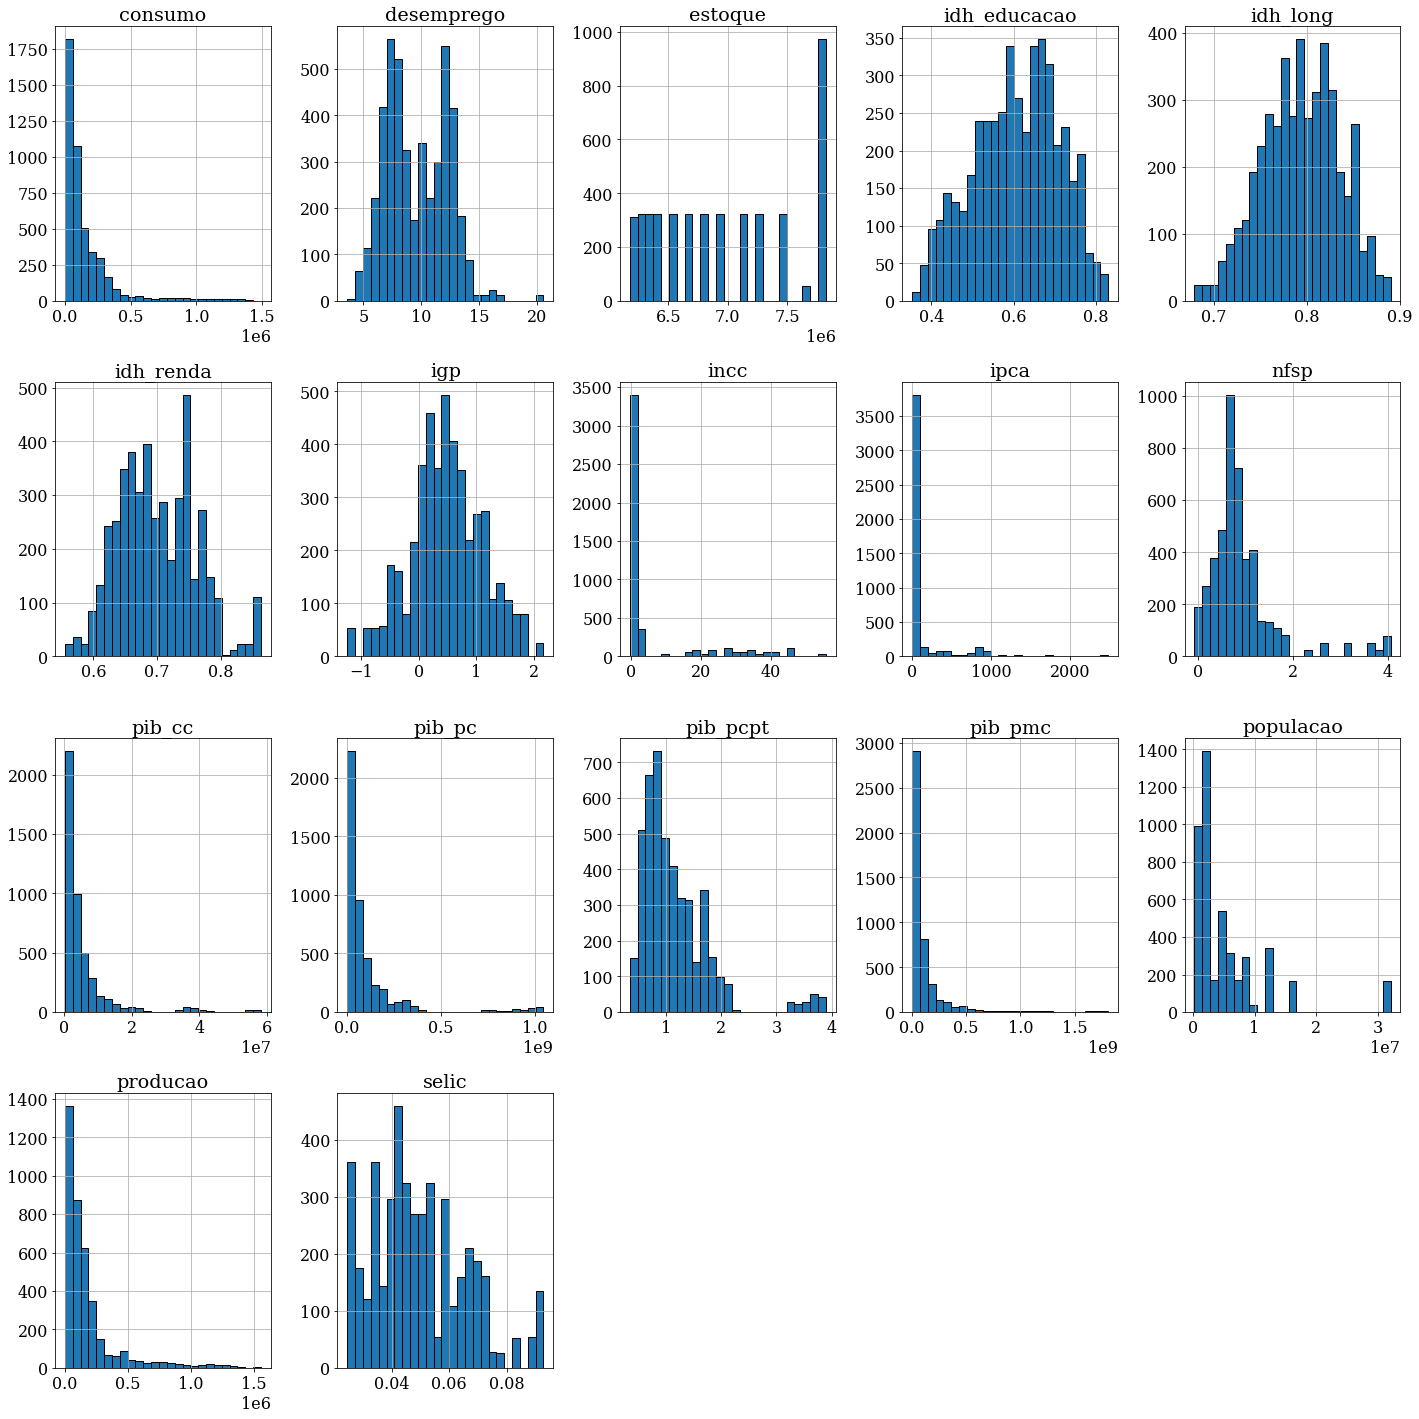

In [22]:
df_input.drop("data", axis=1).hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

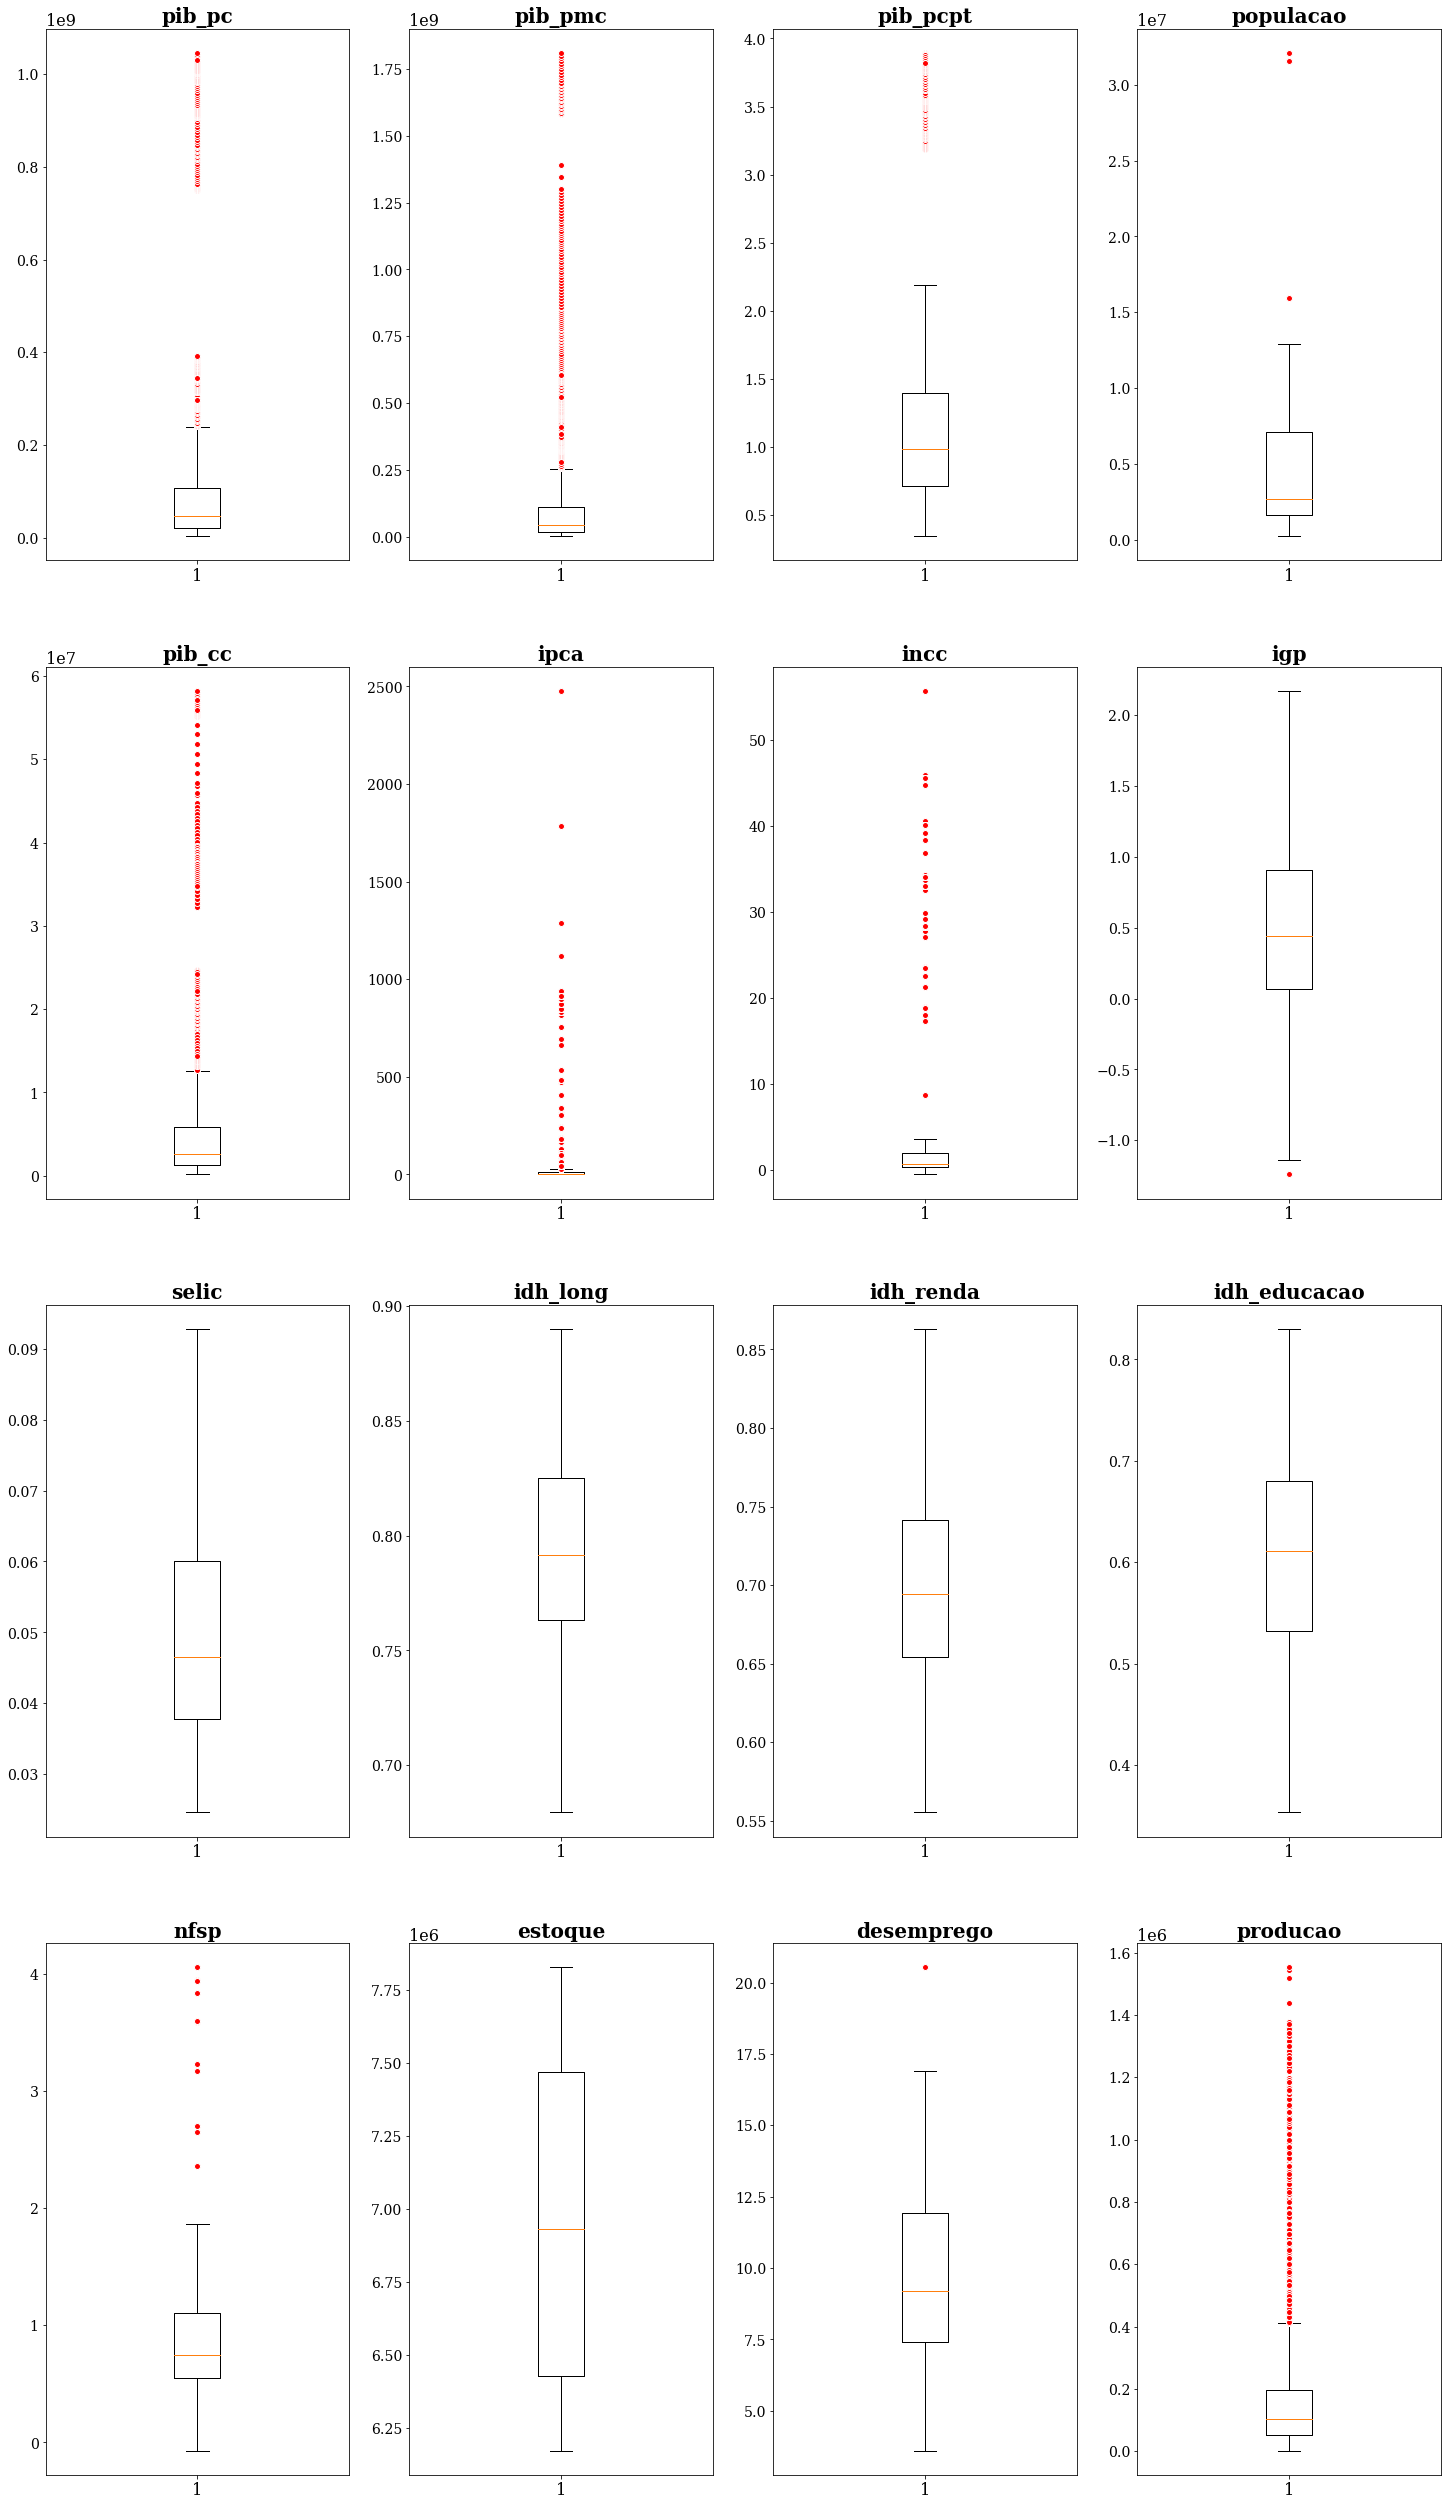

In [23]:
#Creating subplot of each column with its own scale
float64_columns = df_input.drop("data", axis=1).select_dtypes(include='float64').columns
df_float64_columns = df_input[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(4, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

### 3.3. Feature Relationship

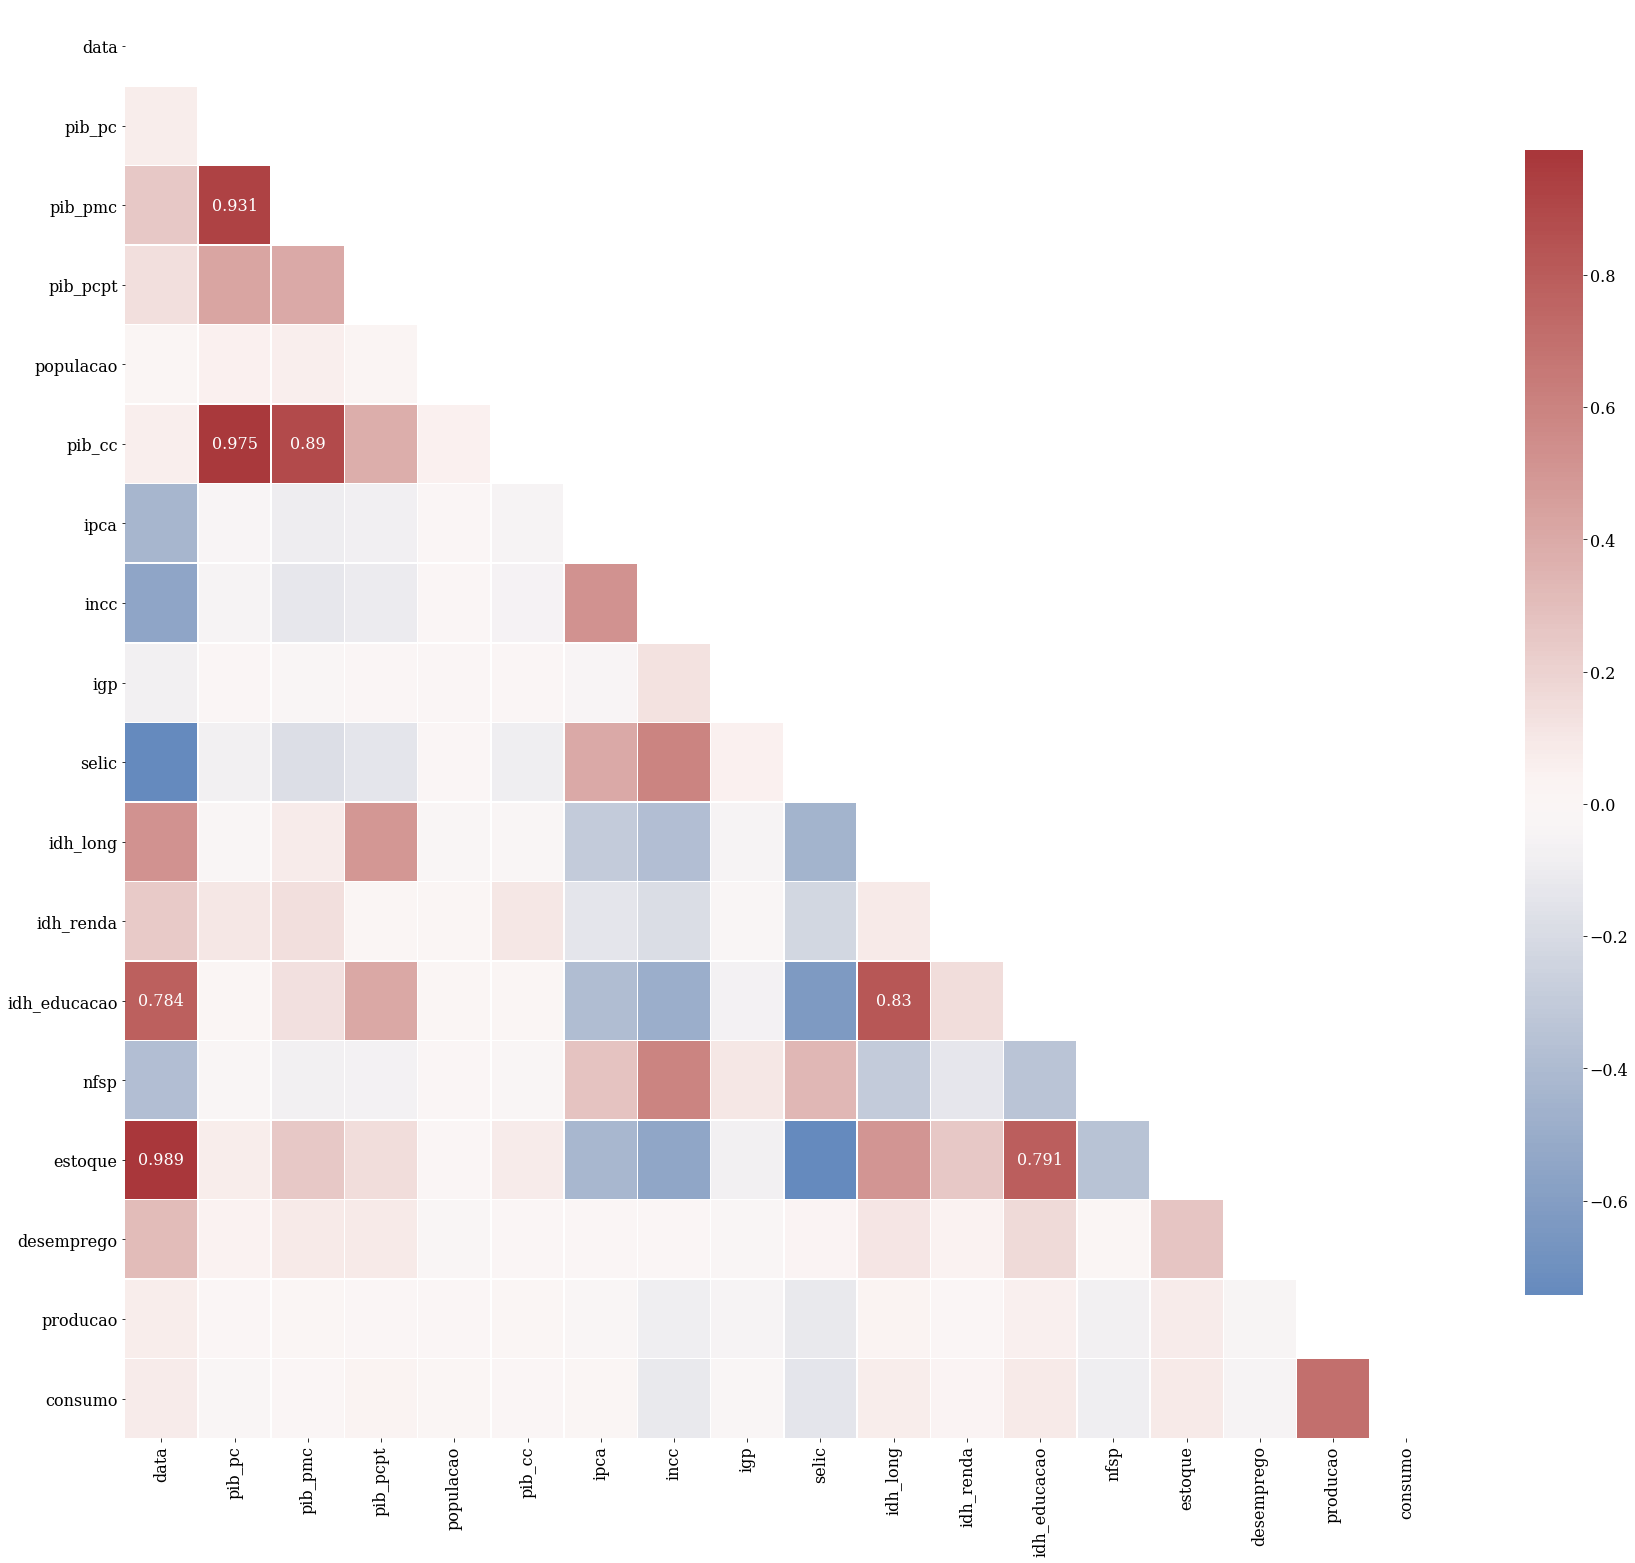

In [24]:
df_corr = df_input.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 3), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(25, 22))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [25]:
corr_matrix = df_input.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

data          estoque         0.988994
pib_pc        pib_cc          0.975354
              pib_pmc         0.930843
pib_pmc       pib_cc          0.890461
idh_long      idh_educacao    0.829691
idh_educacao  estoque         0.791371
data          idh_educacao    0.783688
              selic           0.742599
selic         estoque         0.736445
producao      consumo         0.703153
dtype: float64

## EDA - Target Variable

In [26]:
df_target.shape

(6468, 3)

In [27]:
df_target.head()

data estados  consumo
0  200301      AC   3260.0
1  200301      AL   2191.0
2  200301      AM   2154.0
3  200301      AP   2643.0
4  200301      BA   2546.0

In [28]:
df_target.tail()

data estados  consumo
6463  202212      RS      NaN
6464  202212      SC      NaN
6465  202212      SE      NaN
6466  202212      SP      NaN
6467  202212      TO      NaN

In [29]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     6468 non-null   int64  
 1   estados  6468 non-null   object 
 2   consumo  5253 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 151.7+ KB


## 1. Structure Investigation

In [30]:
df_target.dtypes.value_counts()

float64    1
int64      1
object     1
dtype: int64

### 1.1 Structure of numerical features


In [31]:
df_target.describe().transpose()

count           mean            std       min       25%       50%  \
data     6468.0  201258.262523     575.762580  200301.0  200801.0  201301.0   
consumo  5253.0  154754.148237  206530.897519    1466.0   40132.0   81660.0   

                75%        max  
data     201801.000   202212.0  
consumo  190782.485  1491696.0

In [32]:
df_target.data.nunique()

240

In [33]:
df_input.data.nunique()

180

In [34]:
set(df_input.data) - set(df_target.data)

set()

In [35]:
set(df_target.data) - set(df_input.data)

{201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211,
 202212}

In [69]:
data = df_target["data"]
estados = [column for column in df_target.columns if column != "data"]
datas = np.array([[d] * len(estados) for d in data]).flatten()
estados = np.array(estados * len(data))
df = pd.DataFrame({"data": datas, "estados": estados})
consumo = []

for i in range(df_target.shape[0]):
    consumo.append(df_target.drop("data", axis=1).T[i].values)
#consumo = np.array(consumo).reshape(-1, 1).squeeze()
#df["consumo"] = consumo

consumo = np.array(consumo).flatten()
df["consumo"] = consumo

In [71]:
# df = df[~((df["data"] >= 199001) & (df["data"] <= 199012))].reset_index(drop=True)

In [38]:
# df.describe().T

In [70]:
df

data estados   consumo
0     199001      AC    1450.0
1     199001      AL   27421.0
2     199001      AM   21819.0
3     199001      AP     275.0
4     199001      BA   98829.0
...      ...     ...       ...
9715  201912      RS  223214.0
9716  201912      SC  226233.0
9717  201912      SE   39732.0
9718  201912      SP  692232.0
9719  201912      TO   28749.0

[9720 rows x 3 columns]

In [72]:
df_input

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
0         AC  200301  4.776457e+06  2.514261e+06  0.739806   2026069.0   
1         AL  200301  1.845731e+07  9.715676e+06  0.581097   4949222.0   
2         AM  200301  3.172256e+07  1.669832e+07  0.973688   3201324.0   
3         AP  200301  5.178904e+06  2.726104e+06  0.911519   7127956.0   
4         BA  200301  8.789838e+07  4.626850e+07  0.599762   2582075.0   
...      ...     ...           ...           ...       ...         ...   
5503      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
5504      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
5505      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
5506      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
5507      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc   ipca   incc   igp    selic  idh_long  idh_renda  \
0     4.642918e+05  25.94  29.87  2.17  0.06922    0.7189     0.7061   
1     9.506703e+05  25.94  29.87  2.17  0.06922    0.6794     0.6297   
2     2.201439e+06  25.94  29.87  2.17  0.06922    0.7416     0.5941   
3     2.875050e+05  25.94  29.87  2.17  0.06922    0.7259     0.6548   
4     6.462802e+06  25.94  29.87  2.17  0.06922    0.7109     0.6287   
...            ...    ...    ...   ...      ...       ...        ...   
5503  9.031052e+06   5.90   0.17  1.74  0.02462    0.7800     0.7000   
5504  6.353526e+06   5.90   0.17  1.74  0.02462    0.8700     0.7100   
5505  8.019597e+05   5.90   0.17  1.74  0.02462    0.8500     0.7800   
5506  3.482197e+07   5.90   0.17  1.74  0.02462    0.8000     0.8000   
5507  8.160933e+05   5.90   0.17  1.74  0.02462    0.8100     0.6800   

      idh_educacao  nfsp       estoque  desemprego  producao  
0           0.3952  3.59  6.172460e+06    6.582788       NaN  
1           0.3534  3.59  6.172460e+06    9.080515       NaN  
2           0.4855  3.59  6.172460e+06   12.966133       NaN  
3           0.3951  3.59  6.172460e+06   20.539464       NaN  
4           0.3989  3.59  6.172460e+06   10.735432       NaN  
...            ...   ...           ...         ...       ...  
5503        0.7700  0.49  7.827728e+06   11.100000   49593.0  
5504        0.7800  0.49  7.827728e+06   11.100000   58832.0  
5505        0.8300  0.49  7.827728e+06   11.100000   55602.0  
5506        0.6400  0.49  7.827728e+06   11.100000   45010.0  
5507        0.7300  0.49  7.827728e+06   11.100000   45315.0  

[5508 rows x 18 columns]

In [73]:
df = pd.merge(left=df_input, right=df, how="inner", on=["estados", "data"])

In [74]:
df

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
0         AC  200301  4.776457e+06  2.514261e+06  0.739806   2026069.0   
1         AL  200301  1.845731e+07  9.715676e+06  0.581097   4949222.0   
2         AM  200301  3.172256e+07  1.669832e+07  0.973688   3201324.0   
3         AP  200301  5.178904e+06  2.726104e+06  0.911519   7127956.0   
4         BA  200301  8.789838e+07  4.626850e+07  0.599762   2582075.0   
...      ...     ...           ...           ...       ...         ...   
5503      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
5504      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
5505      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
5506      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
5507      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc   ipca   incc   igp    selic  idh_long  idh_renda  \
0     4.642918e+05  25.94  29.87  2.17  0.06922    0.7189     0.7061   
1     9.506703e+05  25.94  29.87  2.17  0.06922    0.6794     0.6297   
2     2.201439e+06  25.94  29.87  2.17  0.06922    0.7416     0.5941   
3     2.875050e+05  25.94  29.87  2.17  0.06922    0.7259     0.6548   
4     6.462802e+06  25.94  29.87  2.17  0.06922    0.7109     0.6287   
...            ...    ...    ...   ...      ...       ...        ...   
5503  9.031052e+06   5.90   0.17  1.74  0.02462    0.7800     0.7000   
5504  6.353526e+06   5.90   0.17  1.74  0.02462    0.8700     0.7100   
5505  8.019597e+05   5.90   0.17  1.74  0.02462    0.8500     0.7800   
5506  3.482197e+07   5.90   0.17  1.74  0.02462    0.8000     0.8000   
5507  8.160933e+05   5.90   0.17  1.74  0.02462    0.8100     0.6800   

      idh_educacao  nfsp       estoque  desemprego  producao   consumo  
0           0.3952  3.59  6.172460e+06    6.582788       NaN    3260.0  
1           0.3534  3.59  6.172460e+06    9.080515       NaN   30109.0  
2           0.4855  3.59  6.172460e+06   12.966133       NaN   28193.0  
3           0.3951  3.59  6.172460e+06   20.539464       NaN   10392.0  
4           0.3989  3.59  6.172460e+06   10.735432       NaN  151297.0  
...            ...   ...           ...         ...       ...       ...  
5503        0.7700  0.49  7.827728e+06   11.100000   49593.0  223214.0  
5504        0.7800  0.49  7.827728e+06   11.100000   58832.0  226233.0  
5505        0.8300  0.49  7.827728e+06   11.100000   55602.0   39732.0  
5506        0.6400  0.49  7.827728e+06   11.100000   45010.0  692232.0  
5507        0.7300  0.49  7.827728e+06   11.100000   45315.0   28749.0  

[5508 rows x 19 columns]

In [42]:
#df = pd.merge(left=df_input, right=df_target, how="inner", on=["estados", "data"])

In [76]:
df["producao"] = df["producao"].fillna(0)

In [77]:
df.to_csv("input_and_output.csv", index=False)

In [44]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 3), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(25, 22))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

NameError: name 'df' is not defined

In [45]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

NameError: name 'df' is not defined

In [46]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import tensorflow as tf
sns.set_palette("Set2")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [47]:
# calcula metricas de regressao
def score_regression_metrics(y_test, y_test_pred):

    RMSE = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
    MAE = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
    MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
    R2 = r2_score(y_true=y_test, y_pred=y_test_pred)

    scores = {
        "neg_root_mean_squared_error": RMSE,
        "neg_mean_absolute_error": MAE,
        "neg_mean_absolute_percentage_error": MAPE,
    }

    return scores

def show_scores (scores):

    print ("Scores obtidos:")

    print (f"RMSE: {scores['neg_root_mean_squared_error']}")
    print (f"MAE: {scores['neg_mean_absolute_error']}")
    print (f"MAPE: {scores['neg_mean_absolute_percentage_error']}")

In [48]:
import numpy as np

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [49]:
df = df_input.copy()

In [50]:
df["producao"] = df["producao"].fillna(0)

In [51]:
df.isna().sum()

estados         0
data            0
pib_pc          0
pib_pmc         0
pib_pcpt        0
populacao       0
pib_cc          0
ipca            0
incc            0
igp             0
selic           0
idh_long        0
idh_renda       0
idh_educacao    0
nfsp            0
estoque         0
desemprego      0
producao        0
consumo         0
dtype: int64

In [52]:
df.to_csv("input_and_output.csv", index=False)

# Regressão Linear

In [246]:
x = df.drop(["data", "consumo", "producao"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [247]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.05339338603363397


In [248]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 192594.06267392653
MAE: 133055.51249697726
MAPE: 2.9476026736917835


In [249]:
x = df.drop(["data", "consumo", "producao"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [250]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.05339338603363397


In [251]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 192594.06267392653
MAE: 133055.51249697726
MAPE: 2.9476026736917835


In [252]:
x = df.drop(["data", "consumo"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [253]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.46587508972855696


In [254]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 144670.3538246889
MAE: 91584.9065080384
MAPE: 1.2922647844179813


In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

# calcula media e desvio padrao do treino e normaliza os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.4615386217647731


In [195]:
y_pred = regr.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 137135.60555998512
MAE: 82437.65253823769
MAPE: 1.5330022450064598


In [196]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 137038.70540447283
MAE: 86964.67303014922
MAPE: 1.253497675227782


# LSTM

In [197]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=32, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [198]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = StandardScaler()

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [199]:
batch_size = 32
epochs = 200
verbose = 1
timesteps = 7

In [200]:
x, y = split_sequences(df.drop(["estados", "data", "producao"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
146/146 [==============================] - 1s 3ms/step - loss: 485737547956224.0000 - RMSE: 22039454.0000
Epoch 2/200
146/146 [==============================] - 0s 3ms/step - loss: 50781629710336.0000 - RMSE: 7126123.0000
Epoch 3/200
146/146 [==============================] - 0s 3ms/step - loss: 27317283848192.0000 - RMSE: 5226594.0000
Epoch 4/200
146/146 [==============================] - 1s 4ms/step - loss: 14131544457216.0000 - RMSE: 3759194.7500
Epoch 5/200
146/146 [==============================] - 1s 5ms/step - loss: 7927697506304.0000 - RMSE: 2815616.7500
Epoch 6/200
146/146 [==============================] - 1s 4ms/step - loss: 4622745337856.0000 - RMSE: 2150057.0000
Epoch 7/200
146/146 [==============================] - 1s 4ms/step - loss: 2639971745792.0000 - RMSE: 1624799.0000
Epoch 8/200
146/146 [==============================] - 1s 4ms/step - loss: 1839748874240.0000 - RMSE: 1356373.3750
Epoch 9/200
146/146 [==============================] - 1s 4ms/step - loss:

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [ ]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

In [244]:
x, y = split_sequences(df.drop(["estados", "data", "producao"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
147/147 [==============================] - 1s 3ms/step - loss: 71059349504.0000 - RMSE: 266569.5938
Epoch 2/200
147/147 [==============================] - 0s 3ms/step - loss: 45754195968.0000 - RMSE: 213902.3125
Epoch 3/200
147/147 [==============================] - 0s 3ms/step - loss: 41871847424.0000 - RMSE: 204626.1094
Epoch 4/200
147/147 [==============================] - 0s 3ms/step - loss: 39409221632.0000 - RMSE: 198517.5625
Epoch 5/200
147/147 [==============================] - 1s 4ms/step - loss: 37689307136.0000 - RMSE: 194137.3438
Epoch 6/200
147/147 [==============================] - 1s 4ms/step - loss: 35137671168.0000 - RMSE: 187450.4531
Epoch 7/200
147/147 [==============================] - 1s 4ms/step - loss: 32098736128.0000 - RMSE: 179161.2031
Epoch 8/200
147/147 [==============================] - 1s 5ms/step - loss: 28235534336.0000 - RMSE: 168034.3281
Epoch 9/200
147/147 [==============================] - 1s 5ms/step - loss: 22409789440.0000 - RMSE: 1496

147/147 [==============================] - 1s 6ms/step - loss: 2304847872.0000 - RMSE: 48008.8320
Epoch 148/200
147/147 [==============================] - 1s 6ms/step - loss: 2225696000.0000 - RMSE: 47177.2812
Epoch 149/200
147/147 [==============================] - 1s 6ms/step - loss: 1964954240.0000 - RMSE: 44327.8047
Epoch 150/200
147/147 [==============================] - 1s 5ms/step - loss: 1959017088.0000 - RMSE: 44260.7852
Epoch 151/200
147/147 [==============================] - 1s 5ms/step - loss: 2093105280.0000 - RMSE: 45750.4688
Epoch 152/200
147/147 [==============================] - 1s 6ms/step - loss: 1844862208.0000 - RMSE: 42951.8594
Epoch 153/200
147/147 [==============================] - 1s 7ms/step - loss: 1995700864.0000 - RMSE: 44673.2695
Epoch 154/200
147/147 [==============================] - 1s 5ms/step - loss: 1863758464.0000 - RMSE: 43171.2695
Epoch 155/200
147/147 [==============================] - 1s 5ms/step - loss: 2337370112.0000 - RMSE: 48346.3555
Epoch 

In [245]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 28009.365608896856
MAE: 18403.48415795293
MAPE: 0.34402007365023457


In [246]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 76185.18056291105
MAE: 43975.14572298729
MAPE: 0.6652359140007931


In [148]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [149]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 484654383104.0000 - RMSE: 696171.2500
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 427032510464.0000 - RMSE: 653477.2500
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 404712488960.0000 - RMSE: 636170.1875
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 383976570880.0000 - RMSE: 619658.4375
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 355405168640.0000 - RMSE: 596158.6875
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 320691208192.0000 - RMSE: 566296.0625
Epoch 7/200
250/250 [==============================] - 1s 6ms/step - loss: 268210946048.0000 - RMSE: 517890.8750
Epoch 8/200
250/250 [==============================] - 1s 6ms/step - loss: 255272599552.0000 - RMSE: 505245.0938
Epoch 9/200
250/250 [==============================] - 2s 6ms/step - loss: 200012546048.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 4772924416.0000 - RMSE: 69086.3516
Epoch 147/200
250/250 [==============================] - 2s 6ms/step - loss: 4514267136.0000 - RMSE: 67188.2969
Epoch 148/200
250/250 [==============================] - 2s 6ms/step - loss: 4608059392.0000 - RMSE: 67882.6875
Epoch 149/200
250/250 [==============================] - 1s 6ms/step - loss: 4522255360.0000 - RMSE: 67247.7188
Epoch 150/200
250/250 [==============================] - 1s 6ms/step - loss: 5723756544.0000 - RMSE: 75655.5156
Epoch 151/200
250/250 [==============================] - 1s 5ms/step - loss: 5183441408.0000 - RMSE: 71996.1172
Epoch 152/200
250/250 [==============================] - 1s 6ms/step - loss: 5150305280.0000 - RMSE: 71765.6250
Epoch 153/200
250/250 [==============================] - 1s 6ms/step - loss: 5884886016.0000 - RMSE: 76713.0078
Epoch 154/200
250/250 [==============================] - 1s 5ms/step - loss: 4533416448.0000 - RMSE: 67330.6484
Epoch 

In [150]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 39939.70136690292
MAE: 21180.724180525358
MAPE: 5.949600310338945e+16


In [151]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 71632.9870342858
MAE: 50577.47313206449
MAPE: 0.7921270312075205


In [217]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=500, verbose=verbose)

Epoch 1/500
250/250 [==============================] - 2s 6ms/step - loss: 489790275584.0000 - RMSE: 699850.1875
Epoch 2/500
250/250 [==============================] - 1s 5ms/step - loss: 436306313216.0000 - RMSE: 660534.8750
Epoch 3/500
250/250 [==============================] - 2s 6ms/step - loss: 419660464128.0000 - RMSE: 647812.0625
Epoch 4/500
250/250 [==============================] - 2s 6ms/step - loss: 408959975424.0000 - RMSE: 639499.8125
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 392973582336.0000 - RMSE: 626876.0625
Epoch 6/500
250/250 [==============================] - 1s 6ms/step - loss: 377813467136.0000 - RMSE: 614665.3125
Epoch 7/500
250/250 [==============================] - 1s 6ms/step - loss: 354480586752.0000 - RMSE: 595382.7500
Epoch 8/500
250/250 [==============================] - 1s 5ms/step - loss: 328297971712.0000 - RMSE: 572972.9375
Epoch 9/500
250/250 [==============================] - 1s 5ms/step - loss: 302379630592.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 4449926656.0000 - RMSE: 66707.7734
Epoch 147/500
250/250 [==============================] - 1s 5ms/step - loss: 4272604416.0000 - RMSE: 65365.1602
Epoch 148/500
250/250 [==============================] - 1s 5ms/step - loss: 4081779200.0000 - RMSE: 63888.8047
Epoch 149/500
250/250 [==============================] - 2s 6ms/step - loss: 3975964928.0000 - RMSE: 63055.2539
Epoch 150/500
250/250 [==============================] - 2s 6ms/step - loss: 3565021696.0000 - RMSE: 59707.8008
Epoch 151/500
250/250 [==============================] - 2s 7ms/step - loss: 3284310528.0000 - RMSE: 57308.9062
Epoch 152/500
250/250 [==============================] - 2s 6ms/step - loss: 4053565696.0000 - RMSE: 63667.6172
Epoch 153/500
250/250 [==============================] - 2s 6ms/step - loss: 4779565568.0000 - RMSE: 69134.3984
Epoch 154/500
250/250 [==============================] - 2s 6ms/step - loss: 3567268096.0000 - RMSE: 59726.6094
Epoch 

250/250 [==============================] - 1s 4ms/step - loss: 2698030592.0000 - RMSE: 51942.5703
Epoch 293/500
250/250 [==============================] - 1s 4ms/step - loss: 2773118208.0000 - RMSE: 52660.4062
Epoch 294/500
250/250 [==============================] - 1s 3ms/step - loss: 2455344896.0000 - RMSE: 49551.4375
Epoch 295/500
250/250 [==============================] - 1s 3ms/step - loss: 2473313280.0000 - RMSE: 49732.4180
Epoch 296/500
250/250 [==============================] - 1s 5ms/step - loss: 2497347840.0000 - RMSE: 49973.4727
Epoch 297/500
250/250 [==============================] - 1s 5ms/step - loss: 2818541824.0000 - RMSE: 53089.9414
Epoch 298/500
250/250 [==============================] - 1s 4ms/step - loss: 2885265664.0000 - RMSE: 53714.6680
Epoch 299/500
250/250 [==============================] - 1s 4ms/step - loss: 2602703104.0000 - RMSE: 51016.6953
Epoch 300/500
250/250 [==============================] - 1s 4ms/step - loss: 2215704832.0000 - RMSE: 47071.2734
Epoch 

250/250 [==============================] - 1s 3ms/step - loss: 2628225792.0000 - RMSE: 51266.2266
Epoch 439/500
250/250 [==============================] - 1s 5ms/step - loss: 2674292224.0000 - RMSE: 51713.5586
Epoch 440/500
250/250 [==============================] - 2s 8ms/step - loss: 2720480512.0000 - RMSE: 52158.2266
Epoch 441/500
250/250 [==============================] - 2s 8ms/step - loss: 2080488576.0000 - RMSE: 45612.3750
Epoch 442/500
250/250 [==============================] - 1s 4ms/step - loss: 2359625984.0000 - RMSE: 48575.9805
Epoch 443/500
250/250 [==============================] - 1s 5ms/step - loss: 2225221888.0000 - RMSE: 47172.2578
Epoch 444/500
250/250 [==============================] - 1s 5ms/step - loss: 1585003008.0000 - RMSE: 39812.0977
Epoch 445/500
250/250 [==============================] - 1s 5ms/step - loss: 2133366528.0000 - RMSE: 46188.3828
Epoch 446/500
250/250 [==============================] - 1s 5ms/step - loss: 1985054208.0000 - RMSE: 44553.9453
Epoch 

In [218]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 27444.06026052622
MAE: 14565.83703824177
MAPE: 1.6945379875649548e+16


In [219]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 85205.9171621067
MAE: 58804.423891151375
MAPE: 0.9006612572314762


In [220]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [221]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=200, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 518333267968.0000 - RMSE: 719953.6875
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 518197116928.0000 - RMSE: 719859.1250
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 513545338880.0000 - RMSE: 716620.7500
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 492222054400.0000 - RMSE: 701585.3750
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 473145573376.0000 - RMSE: 687855.7500
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 463166308352.0000 - RMSE: 680563.2500
Epoch 7/200
250/250 [==============================] - 1s 5ms/step - loss: 456254128128.0000 - RMSE: 675465.8750
Epoch 8/200
250/250 [==============================] - 1s 3ms/step - loss: 450742845440.0000 - RMSE: 671373.8750
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 446972133376.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 86673760256.0000 - RMSE: 294404.0625
Epoch 144/200
250/250 [==============================] - 1s 6ms/step - loss: 77463748608.0000 - RMSE: 278323.0938
Epoch 145/200
250/250 [==============================] - 1s 5ms/step - loss: 76323782656.0000 - RMSE: 276267.5938
Epoch 146/200
250/250 [==============================] - 1s 5ms/step - loss: 80437272576.0000 - RMSE: 283614.6562
Epoch 147/200
250/250 [==============================] - 1s 5ms/step - loss: 79822651392.0000 - RMSE: 282529.0312
Epoch 148/200
250/250 [==============================] - 1s 5ms/step - loss: 77140393984.0000 - RMSE: 277741.5938
Epoch 149/200
250/250 [==============================] - 1s 5ms/step - loss: 70776651776.0000 - RMSE: 266038.8125
Epoch 150/200
250/250 [==============================] - 1s 5ms/step - loss: 70000779264.0000 - RMSE: 264576.5938
Epoch 151/200
250/250 [==============================] - 1s 5ms/step - loss: 67736170496.0000 - RMSE: 

In [222]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 173591.08491016354
MAE: 105235.64959673437
MAPE: 8.922061611803074e+16


In [223]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 209907.96232000104
MAE: 133273.3570319426
MAPE: 1.2125902418427619


In [224]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=500, verbose=verbose)

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 518333169664.0000 - RMSE: 719953.5625
Epoch 2/500
250/250 [==============================] - 1s 6ms/step - loss: 518178013184.0000 - RMSE: 719845.8125
Epoch 3/500
250/250 [==============================] - 2s 7ms/step - loss: 513004699648.0000 - RMSE: 716243.4375
Epoch 4/500
250/250 [==============================] - 2s 7ms/step - loss: 489600188416.0000 - RMSE: 699714.3750
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 468697939968.0000 - RMSE: 684615.1875
Epoch 6/500
250/250 [==============================] - 1s 6ms/step - loss: 458670112768.0000 - RMSE: 677251.8750
Epoch 7/500
250/250 [==============================] - 1s 5ms/step - loss: 452047601664.0000 - RMSE: 672344.8750
Epoch 8/500
250/250 [==============================] - 1s 6ms/step - loss: 446981242880.0000 - RMSE: 668566.5625
Epoch 9/500
250/250 [==============================] - 2s 6ms/step - loss: 443545485312.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 71769628672.0000 - RMSE: 267898.5312
Epoch 144/500
250/250 [==============================] - 1s 5ms/step - loss: 69084831744.0000 - RMSE: 262839.9375
Epoch 145/500
250/250 [==============================] - 1s 5ms/step - loss: 68816388096.0000 - RMSE: 262328.7812
Epoch 146/500
250/250 [==============================] - 1s 5ms/step - loss: 67300077568.0000 - RMSE: 259422.5781
Epoch 147/500
250/250 [==============================] - 1s 4ms/step - loss: 66399215616.0000 - RMSE: 257680.4531
Epoch 148/500
250/250 [==============================] - 1s 5ms/step - loss: 64333385728.0000 - RMSE: 253640.2656
Epoch 149/500
250/250 [==============================] - 1s 5ms/step - loss: 83092406272.0000 - RMSE: 288257.5312
Epoch 150/500
250/250 [==============================] - 1s 5ms/step - loss: 65637933056.0000 - RMSE: 256199.0156
Epoch 151/500
250/250 [==============================] - 1s 4ms/step - loss: 62600790016.0000 - RMSE: 

Epoch 286/500
250/250 [==============================] - 1s 4ms/step - loss: 12825832448.0000 - RMSE: 113251.1953
Epoch 287/500
250/250 [==============================] - 1s 4ms/step - loss: 12751882240.0000 - RMSE: 112924.2344
Epoch 288/500
250/250 [==============================] - 1s 5ms/step - loss: 12993287168.0000 - RMSE: 113988.1016
Epoch 289/500
250/250 [==============================] - 1s 5ms/step - loss: 12175379456.0000 - RMSE: 110342.1016
Epoch 290/500
250/250 [==============================] - 1s 5ms/step - loss: 12652208128.0000 - RMSE: 112482.0312
Epoch 291/500
250/250 [==============================] - 1s 5ms/step - loss: 12265178112.0000 - RMSE: 110748.2656
Epoch 292/500
250/250 [==============================] - 1s 5ms/step - loss: 13087073280.0000 - RMSE: 114398.7500
Epoch 293/500
250/250 [==============================] - 1s 5ms/step - loss: 12427768832.0000 - RMSE: 111479.9062
Epoch 294/500
250/250 [==============================] - 1s 5ms/step - loss: 12316788736

250/250 [==============================] - 1s 6ms/step - loss: 5664893952.0000 - RMSE: 75265.4922
Epoch 432/500
250/250 [==============================] - 1s 6ms/step - loss: 5646858752.0000 - RMSE: 75145.5859
Epoch 433/500
250/250 [==============================] - 1s 6ms/step - loss: 5938541568.0000 - RMSE: 77061.9297
Epoch 434/500
250/250 [==============================] - 2s 8ms/step - loss: 5307229184.0000 - RMSE: 72850.7344
Epoch 435/500
250/250 [==============================] - 2s 6ms/step - loss: 5231296000.0000 - RMSE: 72327.6953
Epoch 436/500
250/250 [==============================] - 2s 7ms/step - loss: 5348545536.0000 - RMSE: 73133.7500
Epoch 437/500
250/250 [==============================] - 1s 5ms/step - loss: 4880258048.0000 - RMSE: 69858.8438
Epoch 438/500
250/250 [==============================] - 2s 6ms/step - loss: 4827506176.0000 - RMSE: 69480.2578
Epoch 439/500
250/250 [==============================] - 1s 6ms/step - loss: 4707738624.0000 - RMSE: 68612.9609
Epoch 

In [225]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 54140.277435541015
MAE: 36542.333513401805
MAPE: 1.4856954434528378e+17


In [226]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 173818.91460540035
MAE: 94696.61034532913
MAPE: 0.9633608166949036


In [203]:
df = df[df["data"] >= 200301]

In [206]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [207]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=verbose)

Epoch 1/200
37/37 [==============================] - 1s 14ms/step - loss: 71641956352.0000 - RMSE: 267660.1562
Epoch 2/200
37/37 [==============================] - 1s 15ms/step - loss: 67819888640.0000 - RMSE: 260422.5156
Epoch 3/200
37/37 [==============================] - 1s 16ms/step - loss: 45620252672.0000 - RMSE: 213588.9844
Epoch 4/200
37/37 [==============================] - 1s 15ms/step - loss: 39509667840.0000 - RMSE: 198770.3906
Epoch 5/200
37/37 [==============================] - 1s 15ms/step - loss: 36756713472.0000 - RMSE: 191720.4062
Epoch 6/200
37/37 [==============================] - 1s 15ms/step - loss: 34536841216.0000 - RMSE: 185840.9062
Epoch 7/200
37/37 [==============================] - 1s 20ms/step - loss: 32107802624.0000 - RMSE: 179186.5000
Epoch 8/200
37/37 [==============================] - 1s 19ms/step - loss: 28758503424.0000 - RMSE: 169583.3281
Epoch 9/200
37/37 [==============================] - 1s 17ms/step - loss: 25787506688.0000 - RMSE: 160584.8906
E

37/37 [==============================] - 1s 21ms/step - loss: 1176303360.0000 - RMSE: 34297.2773
Epoch 150/200
37/37 [==============================] - 1s 19ms/step - loss: 1192279808.0000 - RMSE: 34529.4062
Epoch 151/200
37/37 [==============================] - 1s 17ms/step - loss: 1260185856.0000 - RMSE: 35499.0977
Epoch 152/200
37/37 [==============================] - 1s 18ms/step - loss: 1330657536.0000 - RMSE: 36478.1797
Epoch 153/200
37/37 [==============================] - 1s 18ms/step - loss: 1143692032.0000 - RMSE: 33818.5156
Epoch 154/200
37/37 [==============================] - 1s 18ms/step - loss: 1046953984.0000 - RMSE: 32356.6680
Epoch 155/200
37/37 [==============================] - 1s 19ms/step - loss: 1185252608.0000 - RMSE: 34427.4961
Epoch 156/200
37/37 [==============================] - 1s 16ms/step - loss: 1537636864.0000 - RMSE: 39212.7148
Epoch 157/200
37/37 [==============================] - 1s 18ms/step - loss: 1283536384.0000 - RMSE: 35826.4766
Epoch 158/200
3

In [208]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 23936.411232914095
MAE: 12891.130813695663
MAPE: 0.13885591395906058


In [209]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 46003.17349996378
MAE: 29785.483820511123
MAPE: 0.40046101113814014


In [51]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [52]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 3s 10ms/step - loss: 468517486592.0000 - RMSE: 684483.3750
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 408049680384.0000 - RMSE: 638787.6875
Epoch 3/200
125/125 [==============================] - 1s 12ms/step - loss: 318980030464.0000 - RMSE: 564783.1875
Epoch 4/200
125/125 [==============================] - 1s 10ms/step - loss: 221313024000.0000 - RMSE: 470439.1875
Epoch 5/200
125/125 [==============================] - 2s 12ms/step - loss: 172701122560.0000 - RMSE: 415573.2500
Epoch 6/200
125/125 [==============================] - 1s 11ms/step - loss: 175329771520.0000 - RMSE: 418723.9688
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 186418315264.0000 - RMSE: 431761.8750
Epoch 8/200
125/125 [==============================] - 1s 10ms/step - loss: 119967948800.0000 - RMSE: 346363.9062
Epoch 9/200
125/125 [==============================] - 2s 12ms/step - loss: 42101235712.

125/125 [==============================] - 1s 12ms/step - loss: 12972904448.0000 - RMSE: 113898.6562
Epoch 74/200
125/125 [==============================] - 1s 12ms/step - loss: 10766332928.0000 - RMSE: 103760.9375
Epoch 75/200
125/125 [==============================] - 1s 12ms/step - loss: 12826271744.0000 - RMSE: 113253.1328
Epoch 76/200
125/125 [==============================] - 1s 12ms/step - loss: 11811935232.0000 - RMSE: 108682.7266
Epoch 77/200
125/125 [==============================] - 2s 12ms/step - loss: 10799249408.0000 - RMSE: 103919.4375
Epoch 78/200
125/125 [==============================] - 1s 12ms/step - loss: 12395823104.0000 - RMSE: 111336.5312
Epoch 79/200
125/125 [==============================] - 2s 12ms/step - loss: 21207566336.0000 - RMSE: 145628.1719
Epoch 80/200
125/125 [==============================] - 1s 12ms/step - loss: 12691372032.0000 - RMSE: 112655.9922
Epoch 81/200
125/125 [==============================] - 1s 12ms/step - loss: 14347568128.0000 - RMSE:

In [ ]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [ ]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

In [310]:
df = df[df["data"] >= 200301]

In [311]:
from sklearn.preprocessing import RobustScaler

In [312]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = RobustScaler()

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [313]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [314]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
74/74 [==============================] - 3s 23ms/step - loss: 66604376064.0000 - RMSE: 258078.2344
Epoch 2/200
74/74 [==============================] - 2s 25ms/step - loss: 49377792000.0000 - RMSE: 222211.1406
Epoch 3/200
74/74 [==============================] - 2s 26ms/step - loss: 42396282880.0000 - RMSE: 205903.5781
Epoch 4/200
74/74 [==============================] - 2s 21ms/step - loss: 36176781312.0000 - RMSE: 190201.9531
Epoch 5/200
74/74 [==============================] - 2s 23ms/step - loss: 26631215104.0000 - RMSE: 163190.7344
Epoch 6/200
74/74 [==============================] - 2s 23ms/step - loss: 17866872832.0000 - RMSE: 133667.0156
Epoch 7/200
74/74 [==============================] - 2s 21ms/step - loss: 9782617088.0000 - RMSE: 98907.1172
Epoch 8/200
74/74 [==============================] - 2s 23ms/step - loss: 8369640448.0000 - RMSE: 91485.7422
Epoch 9/200
74/74 [==============================] - 2s 23ms/step - loss: 7197683712.0000 - RMSE: 84839.1641
Epoch 1

74/74 [==============================] - 1s 20ms/step - loss: 1799805568.0000 - RMSE: 42424.1172
Epoch 150/200
74/74 [==============================] - 2s 22ms/step - loss: 1242180224.0000 - RMSE: 35244.5781
Epoch 151/200
74/74 [==============================] - 2s 22ms/step - loss: 1485029760.0000 - RMSE: 38536.0820
Epoch 152/200
74/74 [==============================] - 2s 23ms/step - loss: 1321842816.0000 - RMSE: 36357.1562
Epoch 153/200
74/74 [==============================] - 1s 20ms/step - loss: 1520798208.0000 - RMSE: 38997.4141
Epoch 154/200
74/74 [==============================] - 2s 23ms/step - loss: 1441013248.0000 - RMSE: 37960.6797
Epoch 155/200
74/74 [==============================] - 2s 22ms/step - loss: 1299843328.0000 - RMSE: 36053.3398
Epoch 156/200
74/74 [==============================] - 2s 22ms/step - loss: 1305006720.0000 - RMSE: 36124.8750
Epoch 157/200
74/74 [==============================] - 2s 22ms/step - loss: 1480823936.0000 - RMSE: 38481.4766
Epoch 158/200
7

In [315]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 18529.19469691914
MAE: 11252.454873383116
MAPE: 0.13347795049230984


In [316]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 78197.26384677648
MAE: 40054.330308669414
MAPE: 0.419750536188523


In [ ]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [66]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=300, verbose=verbose, callbacks=[rlrop])

Epoch 1/300
125/125 [==============================] - 2s 9ms/step - loss: 504590860288.0000 - RMSE: 710345.5625
Epoch 2/300
125/125 [==============================] - 1s 12ms/step - loss: 448219742208.0000 - RMSE: 669492.1250
Epoch 3/300
125/125 [==============================] - 2s 12ms/step - loss: 411076952064.0000 - RMSE: 641152.8125
Epoch 4/300
125/125 [==============================] - 1s 10ms/step - loss: 367788883968.0000 - RMSE: 606456.0000
Epoch 5/300
125/125 [==============================] - 1s 10ms/step - loss: 319203639296.0000 - RMSE: 564981.1250
Epoch 6/300
125/125 [==============================] - 2s 12ms/step - loss: 281854410752.0000 - RMSE: 530899.6250
Epoch 7/300
125/125 [==============================] - 2s 12ms/step - loss: 245528100864.0000 - RMSE: 495507.9375
Epoch 8/300
125/125 [==============================] - 1s 12ms/step - loss: 201638199296.0000 - RMSE: 449041.4375
Epoch 9/300
125/125 [==============================] - 1s 9ms/step - loss: 160944979968.0

125/125 [==============================] - 1s 12ms/step - loss: 7377947136.0000 - RMSE: 85894.9766
Epoch 146/300
125/125 [==============================] - 1s 10ms/step - loss: 7470169088.0000 - RMSE: 86430.1406
Epoch 147/300
125/125 [==============================] - 1s 11ms/step - loss: 8591126528.0000 - RMSE: 92688.3281
Epoch 148/300
125/125 [==============================] - 1s 11ms/step - loss: 7264453632.0000 - RMSE: 85231.7656
Epoch 149/300
125/125 [==============================] - 1s 10ms/step - loss: 7011591168.0000 - RMSE: 83735.2422
Epoch 150/300
125/125 [==============================] - 1s 10ms/step - loss: 8056657408.0000 - RMSE: 89758.8828
Epoch 151/300
125/125 [==============================] - 1s 11ms/step - loss: 7979918848.0000 - RMSE: 89330.3906
Epoch 152/300
125/125 [==============================] - 1s 10ms/step - loss: 8862637056.0000 - RMSE: 94141.5781
Epoch 153/300
125/125 [==============================] - 1s 10ms/step - loss: 7255436800.0000 - RMSE: 85178.85

125/125 [==============================] - 1s 8ms/step - loss: 8146391040.0000 - RMSE: 90257.3594
Epoch 290/300
125/125 [==============================] - 1s 9ms/step - loss: 7833931776.0000 - RMSE: 88509.5000
Epoch 291/300
125/125 [==============================] - 2s 12ms/step - loss: 7719895040.0000 - RMSE: 87862.9297
Epoch 292/300
125/125 [==============================] - 2s 12ms/step - loss: 7258244096.0000 - RMSE: 85195.3281
Epoch 293/300
125/125 [==============================] - 1s 11ms/step - loss: 7487520256.0000 - RMSE: 86530.4609
Epoch 294/300
125/125 [==============================] - 2s 13ms/step - loss: 8400339968.0000 - RMSE: 91653.3672
Epoch 295/300
125/125 [==============================] - 2s 14ms/step - loss: 6778018816.0000 - RMSE: 82328.7266
Epoch 296/300
125/125 [==============================] - 1s 11ms/step - loss: 6917691392.0000 - RMSE: 83172.6562
Epoch 297/300
125/125 [==============================] - 1s 11ms/step - loss: 7531008000.0000 - RMSE: 86781.3828

In [67]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 64743.64517874937
MAE: 39225.6320961278
MAPE: 1.2366986520657118e+17


In [68]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 66886.09963027056
MAE: 49132.21985677083
MAPE: 1.039925971916201


In [69]:
from sklearn.preprocessing import QuantileTransformer

In [70]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = QuantileTransformer(output_distribution='normal', random_state=0)


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [75]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [76]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=300, verbose=verbose, callbacks=[rlrop])

Epoch 1/300
125/125 [==============================] - 2s 9ms/step - loss: 443173994496.0000 - RMSE: 665713.1250
Epoch 2/300
125/125 [==============================] - 2s 12ms/step - loss: 348883812352.0000 - RMSE: 590663.8750
Epoch 3/300
125/125 [==============================] - 1s 12ms/step - loss: 254922113024.0000 - RMSE: 504898.1250
Epoch 4/300
125/125 [==============================] - 1s 12ms/step - loss: 121243836416.0000 - RMSE: 348200.8438
Epoch 5/300
125/125 [==============================] - 2s 12ms/step - loss: 161611792384.0000 - RMSE: 402009.6875
Epoch 6/300
125/125 [==============================] - 1s 10ms/step - loss: 110485741568.0000 - RMSE: 332393.9688
Epoch 7/300
125/125 [==============================] - 2s 12ms/step - loss: 68257914880.0000 - RMSE: 261262.1562
Epoch 8/300
125/125 [==============================] - 1s 10ms/step - loss: 75413577728.0000 - RMSE: 274615.3125
Epoch 9/300
125/125 [==============================] - 2s 12ms/step - loss: 53424640000.000

125/125 [==============================] - 1s 9ms/step - loss: 5460319744.0000 - RMSE: 73893.9766
Epoch 147/300
125/125 [==============================] - 1s 10ms/step - loss: 6276654592.0000 - RMSE: 79225.3438
Epoch 148/300
125/125 [==============================] - 1s 11ms/step - loss: 5237807616.0000 - RMSE: 72372.7031
Epoch 149/300
125/125 [==============================] - 2s 13ms/step - loss: 6248437248.0000 - RMSE: 79047.0547
Epoch 150/300
125/125 [==============================] - 1s 11ms/step - loss: 5027156480.0000 - RMSE: 70902.4453
Epoch 151/300
125/125 [==============================] - 1s 8ms/step - loss: 5079279616.0000 - RMSE: 71269.0625
Epoch 152/300
125/125 [==============================] - 1s 8ms/step - loss: 6156091904.0000 - RMSE: 78460.7656
Epoch 153/300
125/125 [==============================] - 1s 8ms/step - loss: 3746083584.0000 - RMSE: 61205.2578
Epoch 154/300
125/125 [==============================] - 1s 8ms/step - loss: 7660078592.0000 - RMSE: 87521.8750
Ep

125/125 [==============================] - 2s 14ms/step - loss: 6533501952.0000 - RMSE: 80830.0781
Epoch 292/300
125/125 [==============================] - 2s 14ms/step - loss: 5691903488.0000 - RMSE: 75444.7031
Epoch 293/300
125/125 [==============================] - 2s 13ms/step - loss: 4687540224.0000 - RMSE: 68465.6172
Epoch 294/300
125/125 [==============================] - 2s 13ms/step - loss: 6327513600.0000 - RMSE: 79545.6719
Epoch 295/300
125/125 [==============================] - 2s 13ms/step - loss: 4271172352.0000 - RMSE: 65354.2070
Epoch 296/300
125/125 [==============================] - 2s 12ms/step - loss: 3913305600.0000 - RMSE: 62556.4180
Epoch 297/300
125/125 [==============================] - 2s 13ms/step - loss: 6509813248.0000 - RMSE: 80683.4141
Epoch 298/300
125/125 [==============================] - 2s 14ms/step - loss: 6678413824.0000 - RMSE: 81721.5625
Epoch 299/300
125/125 [==============================] - 2s 14ms/step - loss: 4548690432.0000 - RMSE: 67443.97

In [77]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 34085.65535625817
MAE: 19137.258366263868
MAPE: 1.7557143724712444e+16


In [78]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 123324.69810182358
MAE: 79233.63779089096
MAPE: 1.2987834079889715


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = MinMaxScaler()


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [85]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [81]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose, callbacks=[rlrop])

Epoch 1/200
125/125 [==============================] - 2s 10ms/step - loss: 466608816128.0000 - RMSE: 683087.6875
Epoch 2/200
125/125 [==============================] - 1s 11ms/step - loss: 444717498368.0000 - RMSE: 666871.4375
Epoch 3/200
125/125 [==============================] - 1s 12ms/step - loss: 458577608704.0000 - RMSE: 677183.5625
Epoch 4/200
125/125 [==============================] - 2s 13ms/step - loss: 433245552640.0000 - RMSE: 658213.9375
Epoch 5/200
125/125 [==============================] - 2s 13ms/step - loss: 417569538048.0000 - RMSE: 646196.1875
Epoch 6/200
125/125 [==============================] - 2s 12ms/step - loss: 435274874880.0000 - RMSE: 659753.6250
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 425260220416.0000 - RMSE: 652119.8125
Epoch 8/200
125/125 [==============================] - 1s 11ms/step - loss: 399498117120.0000 - RMSE: 632058.6250
Epoch 9/200
125/125 [==============================] - 2s 12ms/step - loss: 375993958400

125/125 [==============================] - 1s 12ms/step - loss: 28419325952.0000 - RMSE: 168580.3281
Epoch 144/200
125/125 [==============================] - 1s 12ms/step - loss: 29830103040.0000 - RMSE: 172713.9375
Epoch 145/200
125/125 [==============================] - 1s 10ms/step - loss: 28876011520.0000 - RMSE: 169929.4375
Epoch 146/200
125/125 [==============================] - 1s 10ms/step - loss: 29717266432.0000 - RMSE: 172386.9688
Epoch 147/200
125/125 [==============================] - 2s 13ms/step - loss: 27022888960.0000 - RMSE: 164386.4062
Epoch 148/200
125/125 [==============================] - 2s 12ms/step - loss: 28581793792.0000 - RMSE: 169061.5156
Epoch 149/200
125/125 [==============================] - 1s 12ms/step - loss: 29685168128.0000 - RMSE: 172293.8438
Epoch 150/200
125/125 [==============================] - 1s 12ms/step - loss: 28944168960.0000 - RMSE: 170129.8594
Epoch 151/200
125/125 [==============================] - 2s 12ms/step - loss: 28630700032.0000

In [82]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 159133.20183126934
MAE: 85246.44102321219
MAPE: 2.0119105922014973e+17


In [83]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 121178.10205222326
MAE: 69515.43058856938
MAPE: 0.8493857459397844


In [100]:
from sklearn.preprocessing import FunctionTransformer

In [104]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = FunctionTransformer(np.log, validate=True)

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [105]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [106]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose, callbacks=[rlrop])

Epoch 1/200
125/125 [==============================] - 2s 9ms/step - loss: nan - RMSE: nan
Epoch 2/200
125/125 [==============================] - 1s 10ms/step - loss: nan - RMSE: nan
Epoch 3/200
 33/125 [======>.......................] - ETA: 1s - loss: nan - RMSE: nan

KeyboardInterrupt: 

In [94]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 413099.29308280675
MAE: 194490.21534708748
MAPE: 4.3100869800600435e+17


In [95]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 191799.72565559295
MAE: 114477.07738530585
MAPE: 1.359915857160814


In [96]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 2s 11ms/step - loss: 498787221504.0000 - RMSE: 706248.6875
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 460122030080.0000 - RMSE: 678322.9375
Epoch 3/200
125/125 [==============================] - 1s 11ms/step - loss: 454143082496.0000 - RMSE: 673901.3750
Epoch 4/200
125/125 [==============================] - 1s 11ms/step - loss: 448859865088.0000 - RMSE: 669970.0625
Epoch 5/200
125/125 [==============================] - 1s 11ms/step - loss: 447143706624.0000 - RMSE: 668688.0625
Epoch 6/200
125/125 [==============================] - 2s 13ms/step - loss: 443137654784.0000 - RMSE: 665685.8750
Epoch 7/200
125/125 [==============================] - 1s 11ms/step - loss: 440872828928.0000 - RMSE: 663982.5625
Epoch 8/200
125/125 [==============================] - 1s 11ms/step - loss: 438405562368.0000 - RMSE: 662122.0000
Epoch 9/200
125/125 [==============================] - 1s 11ms/step - loss: 436053606400

125/125 [==============================] - 2s 15ms/step - loss: 24717213696.0000 - RMSE: 157217.0938
Epoch 144/200
125/125 [==============================] - 2s 14ms/step - loss: 54110003200.0000 - RMSE: 232615.5625
Epoch 145/200
125/125 [==============================] - 1s 11ms/step - loss: 34252584960.0000 - RMSE: 185074.5312
Epoch 146/200
125/125 [==============================] - 1s 12ms/step - loss: 49694519296.0000 - RMSE: 222922.6719
Epoch 147/200
125/125 [==============================] - 2s 14ms/step - loss: 29725808640.0000 - RMSE: 172411.7344
Epoch 148/200
125/125 [==============================] - 2s 13ms/step - loss: 19628607488.0000 - RMSE: 140102.1250
Epoch 149/200
125/125 [==============================] - 2s 15ms/step - loss: 18997401600.0000 - RMSE: 137831.0625
Epoch 150/200
125/125 [==============================] - 1s 10ms/step - loss: 19157161984.0000 - RMSE: 138409.4062
Epoch 151/200
125/125 [==============================] - 2s 12ms/step - loss: 17396387840.0000

In [97]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 82599.15042901639
MAE: 46224.362099639715
MAPE: 1.0627194237488314e+17


In [98]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 86787.23660850871
MAE: 58775.426530640514
MAPE: 1.2004367130134526


In [99]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = StandardScaler()


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [317]:
df

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
3888      AC  200301  4.776457e+06  2.514261e+06  0.739806   2026069.0   
3889      AL  200301  1.845731e+07  9.715676e+06  0.581097   4949222.0   
3890      AM  200301  3.172256e+07  1.669832e+07  0.973688   3201324.0   
3891      AP  200301  5.178904e+06  2.726104e+06  0.911519   7127956.0   
3892      BA  200301  8.789838e+07  4.626850e+07  0.599762   2582075.0   
...      ...     ...           ...           ...       ...         ...   
9391      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
9392      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
9393      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
9394      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
9395      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc   ipca   incc   igp    selic  idh_long  idh_renda  \
3888  4.642918e+05  25.94  29.87  2.17  0.06922    0.7189     0.7061   
3889  9.506703e+05  25.94  29.87  2.17  0.06922    0.6794     0.6297   
3890  2.201439e+06  25.94  29.87  2.17  0.06922    0.7416     0.5941   
3891  2.875050e+05  25.94  29.87  2.17  0.06922    0.7259     0.6548   
3892  6.462802e+06  25.94  29.87  2.17  0.06922    0.7109     0.6287   
...            ...    ...    ...   ...      ...       ...        ...   
9391  9.031052e+06   5.90   0.17  1.74  0.02462    0.7800     0.7000   
9392  6.353526e+06   5.90   0.17  1.74  0.02462    0.8700     0.7100   
9393  8.019597e+05   5.90   0.17  1.74  0.02462    0.8500     0.7800   
9394  3.482197e+07   5.90   0.17  1.74  0.02462    0.8000     0.8000   
9395  8.160933e+05   5.90   0.17  1.74  0.02462    0.8100     0.6800   

      idh_educacao  nfsp       estoque  desemprego  producao   consumo  
3888        0.3952  3.59  6.172460e+06    6.582788       0.0    3260.0  
3889        0.3534  3.59  6.172460e+06    9.080515       0.0   30109.0  
3890        0.4855  3.59  6.172460e+06   12.966133       0.0   28193.0  
3891        0.3951  3.59  6.172460e+06   20.539464       0.0   10392.0  
3892        0.3989  3.59  6.172460e+06   10.735432       0.0  151297.0  
...            ...   ...           ...         ...       ...       ...  
9391        0.7700  0.49  7.827728e+06   11.100000   49593.0  223214.0  
9392        0.7800  0.49  7.827728e+06   11.100000   58832.0  226233.0  
9393        0.8300  0.49  7.827728e+06   11.100000   55602.0   39732.0  
9394        0.6400  0.49  7.827728e+06   11.100000   45010.0  692232.0  
9395        0.7300  0.49  7.827728e+06   11.100000   45315.0   28749.0  

[5508 rows x 19 columns]